## 1. Imports

In [32]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


### 1.1 Data imports

In [33]:
content_raw = pd.read_pickle('03_final/speech_content.pkl')
contributions_raw = pd.read_pickle('03_final/contributions_simplified.pkl')
politicians_raw = pd.read_csv('03_final/politicians.csv')
factions_raw = pd.read_pickle('03_final/factions.pkl')
contributions_raw = pd.read_pickle('03_final/contributions_simplified.pkl')
topics_raw = pd.read_pickle('03_final/dims.pkl')

In [34]:
content_raw.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640746000.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640746000.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640746000.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",-640746000.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640746000.0


In [35]:
# show shape of the df
print(content_raw.shape)

#download head as excel
#content_raw.head().to_excel('content_raw_head.xlsx')


(967004, 14)


In [36]:
contributions_raw.head()

,text_position,content,speech_id
0,0.0,(Nellen),1.0
0,1.0,"(Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksa...",2.0
1,0.0,(Drucksache Nr. 3308),2.0
0,1.0,(Zurufe: Wiederholen!),4.0
1,0.0,(Zurufe: Sofort!),4.0


In [37]:
politicians_raw.tail()

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name
19627,11002597,11,5,Friedrich,Zimmermann,München,Deutschland,18.07.1925,16.09.2012,männlich,"Rechtsanwalt, Bundesminister für Verkehr",NaN,NaN,Dr.,Regierungsmitglied,Verkehr
19628,11002597,12,5,Friedrich,Zimmermann,München,Deutschland,18.07.1925,16.09.2012,männlich,"Rechtsanwalt, Bundesminister für Verkehr",NaN,NaN,Dr.,Regierungsmitglied,Verkehr
19629,11003870,15,25,Brigitte,Zypries,Kassel,Deutschland,16.11.1953,-1,weiblich,"Bundesministerin für Wirtschaft und Energie, J...",NaN,NaN,NaN,Regierungsmitglied,Justiz
19630,11003870,16,25,Brigitte,Zypries,Kassel,Deutschland,16.11.1953,-1,weiblich,"Bundesministerin für Wirtschaft und Energie, J...",NaN,NaN,NaN,Regierungsmitglied,Justiz
19631,11003870,19,25,Brigitte,Zypries,Kassel,Deutschland,16.11.1953,-1,weiblich,"Bundesministerin für Wirtschaft und Energie, J...",NaN,NaN,NaN,Regierungsmitglied,Wirtschaft und Energie


In [38]:
politicians_raw.shape

(19632, 16)

In [39]:
factions_raw.head(50)

,id,abbreviation,faction_name
0,0,AfD,Fraktion Alternative für Deutschland
1,2,BP,Fraktion Bayernpartei
2,4,Bündnis 90/Die Grünen,Fraktion BÜNDNIS 90/DIE GRÜNEN
3,7,DIE LINKE.,Fraktion DIE LINKE.
4,9,DP/DPB,Fraktion DP/DPB (Gast)
5,12,DRP,Fraktion DRP (Gast)
6,6,DA,Fraktion Demokratische Arbeitsgemeinschaft
7,8,DP,Fraktion Deutsche Partei
8,11,DPB,Fraktion Deutsche Partei Bayern
9,9,DP/DPB,Fraktion Deutsche Partei/Deutsche Partei Bayern


In [40]:
contributions_raw.head(5)

,text_position,content,speech_id
0,0.0,(Nellen),1.0
0,1.0,"(Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksa...",2.0
1,0.0,(Drucksache Nr. 3308),2.0
0,1.0,(Zurufe: Wiederholen!),4.0
1,0.0,(Zurufe: Sofort!),4.0


In [41]:
contributions_raw.shape

(1966165, 3)

### 1.2 Addtitional data


In [42]:
cities_with_info_raw = pd.read_excel('05-staedte.xlsx')
cities_with_info_raw.head()

,Lfd. Nr.,Land,RB,Kreis,Verb,Gem,Stadt,Post-leitzahl 1),Fläche in km2 2),Bevölkerung3),Männlich,Weiblich,je km2
0,1,11.0,0.0,0.0,0.0,0.0,"Berlin, Stadt",10178.0,891.12,3755251.0,1843196.0,1912055.0,4214.0
1,2,2.0,0.0,0.0,0.0,0.0,"Hamburg, Freie und Hansestadt",20095.0,755.09,1892122.0,925616.0,966506.0,2506.0
2,3,9.0,1.0,62.0,0.0,0.0,"München, Landeshauptstadt",80331.0,310.70,1512491.0,736806.0,775685.0,4868.0
3,4,5.0,3.0,15.0,0.0,0.0,"Köln, Stadt",50667.0,405.02,1084831.0,526588.0,558243.0,2678.0
4,5,6.0,4.0,12.0,0.0,0.0,"Frankfurt am Main, Stadt",60311.0,248.31,773068.0,380566.0,392502.0,3113.0


## 2. Data Cleaning

### 2.1 Duplicates

In [43]:
content = content_raw.copy()

# Check for duplicates
print(content.duplicated().sum())

# Remove duplicates
content.drop_duplicates(inplace=True)

# show duplicates of ids
content[content.duplicated(subset='id', keep=False)].sort_values(by='id')

0


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date


In [44]:
len(content)

967004

In [45]:
#check for duplicate content, also trimming the content as there might be variations at the end.
# a length of 200 characters ensures that there are duplicates for sure

# trim length of content to 200 caracters
content['content_trimmed'] = content['speech_content'].str[:200]

duplicates=content[
    content.duplicated(
        subset=['politician_id', 'content_trimmed'],
        keep=False
    )
].sort_values(by=['politician_id', 'content_trimmed'])

# analyze in excel

# filter for all where length is larger than 200
duplicates = duplicates[duplicates['content_trimmed'].str.len() > 150]

#download as excel
duplicates.to_excel('duplicates_2.xlsx')

We found that the xml was not correct for 2013-06-26. Every entry is doubled in some variations. Thus, we will delete duplicates in contetnt and keep the last


In [46]:
# Delete speech_content duplicates for date: 2013-06-26 and keep the last

# Step 2: Create a temporary DataFrame for only the relevant subset
subset_df = content[(content['electoral_term'] == 17) & (content['session'] == 250)]

# Step 3: Identify 'id' values to drop by finding duplicates within this subset
# Keep only the last duplicate based on 'politician_id' and 'content_trimmed'
ids_to_drop = subset_df.duplicated(subset=['politician_id', 'content_trimmed'], keep='last')
ids_to_drop = subset_df[ids_to_drop]['id'].tolist()

# Step 4: Drop these 'id' values from the original DataFrame
content = content[~content['id'].isin(ids_to_drop)]

# drop the column content_trimmed
content.drop(columns=['content_trimmed'], inplace=True)
content.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640746000.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640746000.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640746000.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",-640746000.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640746000.0


In [47]:
len(content)

966540

In [48]:
# show term 17, session 250 to prove
content[(content['electoral_term'] == 17) & (content['session'] == 250)]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
1,792791,17,250,Norbert,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,,,Die Sitzung ist eröffnet. Nehmen Sie bitte Pla...,1.372288e+09
2,792792,17,250,Norbert Lammert,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Berichterstattung,-1,Presidium of Parliament,präsident,-1,,,Abgeordnete Sibylle Pfeiffer\nStefan Rebmann\n...,1.372288e+09
4,792794,17,250,Angela,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Merkel,-1,Chancellor,,11001478,Zusatzpunkt 4,a) Erste Beratung des von der Bundesregierung ...,Sehr geehrter Herr Präsident! Liebe Kolleginne...,1.372288e+09
6,792796,17,250,Peer,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Steinbrück,25,Member of Parliament,,11004165,Zusatzpunkt 4,a) Erste Beratung des von der Bundesregierung ...,Herr Präsident! Meine lieben Kolleginnen und K...,1.372288e+09
7,792797,17,250,Norbert,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,Zusatzpunkt 4,a) Erste Beratung des von der Bundesregierung ...,Ich eröffne die Aussprache. Das Wort erhält al...,1.372288e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,793796,17,250,Claudia,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Bögel,15,Member of Parliament,,11004015,Tagesordnungspunkt 68,Absetzung der,Die Debatte um das Thema Netzneutralität wird\...,1.372288e+09
1007,793797,17,250,Halina,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Wawzyniak,7,Member of Parliament,,11004185,Tagesordnungspunkt 68,Absetzung der,Fast über die ganze Legislaturperiode hinweg b...,1.372288e+09
1008,793798,17,250,Halina,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Wawzyniak,7,Member of Parliament,,11004185,Tagesordnungspunkt 68,Absetzung der,Fast über die ganze Legislaturperiode hinweg b...,1.372288e+09
1010,793800,17,250,Konstantin,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Notz,4,Member of Parliament,,11004123,Tagesordnungspunkt 68,Absetzung der,Lassen sich mich gleich zu Beginn sagen: Mit d...,1.372288e+09


Also, we realized that some sessionns are in there twice, we will delete accordingly

In [49]:
# delete sessions: electoral term 1, session 21; electoral term 1, session 149; electoral term 1, session 76; electoral term 2, session 219; elecoral term 2, session 226

# Define the list of (electoral_term, session) pairs you want to delete
sessions_to_delete = [
    (1, 21), 
    (1, 149), 
    (1, 76), 
    (2, 219), 
    (2, 226)
]

# Use .isin() with a multi-column filter to exclude these rows
content = content[~content[['electoral_term', 'session']].apply(tuple, axis=1).isin(sessions_to_delete)]

# Reset index if desired (optional)
content = content.reset_index(drop=True)

In [50]:
len(content)

966046

In [51]:
politicians = politicians_raw.copy()

# Check for duplicates
print(politicians.duplicated().sum())

# Remove duplicates
politicians.drop_duplicates(inplace=True)

# show duplicates of ids and electoral terms
politicians[politicians.duplicated(subset=['ui', 'electoral_term'], keep=False)].sort_values(by=['ui', 'electoral_term'])


# Remove duplications: keep one name if namechange (marriage), keep only longest academic title if multiple, keep only one faction if multiple
# Step 1: Function to consolidate values, including longest title, actual faction, institution name, and name streamlining
def consolidate_group(group):
    # 1. Longest academic title
    longest_title_idx = group['academic_title'].dropna().str.len().idxmax() if not group['academic_title'].dropna().empty else None
    if longest_title_idx is not None:
        longest_title = group.loc[longest_title_idx, 'academic_title']
        group['academic_title'] = group['academic_title'].fillna(longest_title)  # Fill if we found a valid longest title

    # 2. Faction: prefer entries with a valid faction (i.e., non-null faction_id and non-Fraktionslos)
    valid_faction = group.loc[group['faction_id'].notnull()]
    if not valid_faction.empty:
        valid_faction_row = valid_faction.iloc[0]  # Take the first valid faction row
        group['faction_id'] = group['faction_id'].fillna(valid_faction_row['faction_id'])
        group['institution_name'] = group['institution_name'].fillna(valid_faction_row['institution_name'])

    # 3. Streamline names: prioritize the most recent last name and first name
    most_recent_entry = group.iloc[-1]  # Take the most recent entry as the baseline for names
    group['last_name'] = group['last_name'].fillna(most_recent_entry['last_name'])
    group['first_name'] = group['first_name'].fillna(most_recent_entry['first_name'])

    # 4. Prefer ui that is not -1 and does not start with 9
    valid_ui = group.loc[(group['ui'] != -1) & (~group['ui'].astype(str).str.startswith('9'))]
    if not valid_ui.empty:
        valid_ui_row = valid_ui.iloc[0]  # Take the first valid ui row
        group['ui'] = group['ui'].fillna(valid_ui_row['ui'])

    return group

# Step 2: Apply the function, grouping by both 'ui' and 'electoral_term'
politicians = politicians.groupby(['ui', 'electoral_term']).apply(consolidate_group)

# Optional: Reset index if needed
politicians.reset_index(drop=True, inplace=True)

# Step 3: Drop duplicates within each group, keeping the relevant rows --> otherwise dfs cannot be merged
politicians['ui'] = politicians['ui'].astype(int)
politicians['electoral_term'] = politicians['electoral_term'].astype(int)
politicians = politicians.drop_duplicates(subset=['ui', 'electoral_term'], keep='first')

unique_combinations = politicians[['ui', 'electoral_term']].drop_duplicates()
print('unique politicians after dupl removal:', len(unique_combinations))

759
unique politicians after dupl removal: 12492


In [52]:
# Check for politicians with the same name but different uis in the same electoral term
duplicate_names = (
    politicians.groupby(['electoral_term','first_name', 'last_name'])
    .filter(lambda group: group['ui'].nunique() > 1)  # Only keep groups with more than one unique 'ui'
)

# Step 2: Display the result
duplicate_names

duplicate_name_df = politicians.groupby(['first_name', 'last_name']).filter(lambda x: x['ui'].nunique() > 1)

# Display the filtered DataFrame
duplicate_name_df = duplicate_name_df.sort_values(['first_name', 'last_name', 'ui']).reset_index(drop=True)
duplicate_name_df

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name
0,11001769,5,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
1,11001769,6,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
2,11001769,7,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
3,11001769,8,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
4,11001769,9,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,11002022,15,25,Wilhelm,Schmidt,Barbecke / Krs. Peine,Deutschland,13.05.1944,-1,männlich,Kommunalbeamter a. D.,Salzgitter,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...
106,11002023,6,25,Wolfgang,Schmidt,Niederselters,Deutschland,18.04.1934,22.05.2000,männlich,Luftfahrtangestellter,Niederselters,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...
107,11002023,7,25,Wolfgang,Schmidt,Niederselters,Deutschland,18.04.1934,22.05.2000,männlich,Luftfahrtangestellter,Niederselters,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...
108,11002023,8,25,Wolfgang,Schmidt,Niederselters,Deutschland,18.04.1934,22.05.2000,männlich,Luftfahrtangestellter,Niederselters,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...


In [53]:
# show all whre ui is -1 or starts with 9
politicians[(politicians['ui'] == -1) | (politicians['ui'].astype(str).str.startswith('9'))]

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name


Even though there are some different values, the politician id seems unique in most cases

### 2.2 Missing Values

In [54]:
# Check for missing values in each column
print(content.isnull().sum())

# Check for values = -1 in each column
print((content == -1).sum())

# convert all -1 into NaN
content.replace(-1, np.nan, inplace=True)

# convert all "Not found" into NaN
content.replace('Not found', np.nan, inplace=True)
content.replace('Not found ', np.nan, inplace=True)

print(content.isnull().sum())

# Problem with missing politician_id and faction_id

# calculate percentag of how many politician_ids are missing
politician_id_missing = content['politician_id'].isnull().sum()
politician_id_total = len(content)
politician_id_missing_percentage = politician_id_missing / politician_id_total * 100
print(f'Missing politician_id: {politician_id_missing} ({politician_id_missing_percentage:.2f}%)')


id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id             0
position_short         0
position_long      58908
politician_id          0
top_item          640052
top_title         640052
speech_content         0
date                   0
dtype: int64
id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id        604974
position_short         0
position_long          0
politician_id      37790
top_item               0
top_title              0
speech_content         0
date                   0
dtype: int64
id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id        604974
position_short     41512
position_long      58908
politician_id      37790
top_item          640052

In [55]:
# check for missing values in each column politicians
print(politicians.isnull().sum())

# check for values = -1 in each column politicians
print((politicians == -1).sum())

# convert all -1 into NaN
politicians.replace(-1, np.nan, inplace=True)

print(politicians.isnull().sum())


ui                      0
electoral_term          0
faction_id              0
first_name              0
last_name               0
birth_place            26
birth_country          22
birth_date              0
death_date              0
gender                 22
profession             40
constituency        10776
aristocracy         12390
academic_title       9159
institution_type        0
institution_name        0
dtype: int64
ui                   0
electoral_term       0
faction_id          39
first_name           0
last_name            0
birth_place          0
birth_country        0
birth_date           0
death_date           0
gender               0
profession           0
constituency         0
aristocracy          0
academic_title       0
institution_type     0
institution_name     0
dtype: int64
ui                      0
electoral_term          0
faction_id             39
first_name              0
last_name               0
birth_place            26
birth_country          22
birth_da

In [56]:
# missing values in contribution df
print(contributions_raw.isnull().sum())


text_position    0
content          0
speech_id        0
dtype: int64


### 2.3 Fill missing values

In [57]:
# Match Politician ID based on name and electoral term
politicians['first_name'] = politicians['first_name'].str.lower()
politicians['last_name'] = politicians['last_name'].str.lower()

content['first_name'] = content['first_name'].str.lower()
content['last_name'] = content['last_name'].str.lower()


# show duplicated of first name, last name and electoral term
duplicated_names_terms = politicians[politicians.duplicated(subset=['first_name', 'last_name', 'electoral_term'], keep=False)].sort_values(by=['first_name', 'last_name', 'electoral_term'])

print(len(duplicated_names_terms))

#since there are only 8 duplicates of first_name, last_name, and electoral term; we can use the ui to match the speeches

# to have a clean match, we need to remove the duplicates
politicians_cleaned_name_term_only = politicians.drop_duplicates(subset=['first_name', 'last_name', 'electoral_term'], keep='first')  


8


In [58]:
# Match Politician ID based on name and electoral term only if there is no ambiguity

content_filled = pd.merge(content, politicians_cleaned_name_term_only[['ui', 'first_name', 'last_name', 'electoral_term']], how='left',
                    left_on=['first_name', 'last_name', 'electoral_term'], right_on=['first_name', 'last_name', 'electoral_term'])

content_filled.head()

# if politician_id is na, fill with ui
content_filled['politician_id'] = content_filled['politician_id'].fillna(content_filled['ui'])



content_filled.drop(columns=['ui'], inplace=True)
content_filled.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640746000.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640746000.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640746000.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-640746000.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640746000.0


In [59]:
#Check for correct merge
print(len(content_filled))
content_filled

966046


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-6.407460e+08
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-6.407460e+08
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-6.407460e+08
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-6.407460e+08
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-6.407460e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966041,1120313,20,16,lennard,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,oehl,NaN,NaN,None,11005170.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,1.644970e+09
966042,1120314,20,16,yvonne,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,magwas,NaN,Presidium of Parliament,Vizepräsidentin,11004346.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,"Ich erteile das Wort Dr. Stefan Heck, CDU/CSU-...",1.644970e+09
966043,1120315,20,16,stefan,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,heck,NaN,NaN,None,11004294.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,Frau Präsidentin! Meine sehr geehrten Damen un...,1.644970e+09
966044,1120316,20,16,yvonne,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,magwas,NaN,Presidium of Parliament,Vizepräsidentin,11004346.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,Der letzte Redner in dieser Runde ist Uli Gröt...,1.644970e+09


In [60]:
# show where politician id is na and electoral period 18
content_filled[(content_filled['politician_id'].isnull()) & (content_filled['electoral_term'] == 18)]

# The name Tomas de Maizere was often misinterpreted, we will fix it in the following way:
# if first_name tomas maizi, fill first name with Thomas, last name Maizière, faction_id 5, position_short Minister, politician id 11004105
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'last_name'] = 'maizière'
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'faction_id'] = 5
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'position_short'] = 'Minister'
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'politician_id'] = 11004105
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'first_name'] = 'Thomas'

content_filled[(content_filled['politician_id'].isnull()) & (content_filled['electoral_term'] == 18)]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
793179,794137,18,2,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 2,Vereinbarte Debatte: zu den Abhöraktivitäten d...,Frau Präsidentin! Meine verehrten Damen und He...,1.384733e+09
793181,794139,18,2,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 2,Vereinbarte Debatte: zu den Abhöraktivitäten d...,Nein. Diese Dinge sind für mich ausdiskutiert ...,1.384733e+09
793321,794279,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,Tagesordnungspunkt 6,Fragestunde\n(Drucksache 18/87). . . . . . . ....,"Frau Kollegin Groth, die Bundesregierung setzt...",1.385597e+09
793325,794283,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,Tagesordnungspunkt 6,Fragestunde\n(Drucksache 18/87). . . . . . . ....,"Frau Kollegin, ich habe ja gerade gesagt - dar...",1.385597e+09
793328,794286,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,Tagesordnungspunkt 6,Fragestunde\n(Drucksache 18/87). . . . . . . ....,"Herr Kollege, auch darüber haben wir ausführli...",1.385597e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842794,843752,18,233,claudia roth,https://dip21.bundestag.de/dip21/btp/18/18233.pdf,https,NaN,Presidium of Parliament,vizepräsidentin,NaN,Tagesordnungspunkt 2,"Fragestunde\nDrucksachen 18/12321, 18/12352 . ...",//www.zukunft-erdgas.info/fileadmin/public/PDF...,1.494976e+09
842860,843818,18,233,merkel die heute,https://dip21.bundestag.de/dip21/btp/18/18233.pdf,sagte,NaN,Chancellor,,NaN,Tagesordnungspunkt 4,Beschlussempfehlung und Bericht des Ausschusse...,Für Integration müssen wir uns\naufeinander ei...,1.494976e+09
843338,844296,18,235,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18235.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 39,Antrag der Abgeordneten Marieluise Beck\n(Brem...,Frau Präsidentin! Meine verehrten Kolleginnen ...,1.495148e+09
844350,845308,18,239,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18239.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 6,Unterrichtung durch die Bundesregierung: Beric...,Frau Präsidentin! Meine verehrten Kolleginnen ...,1.498000e+09


31697


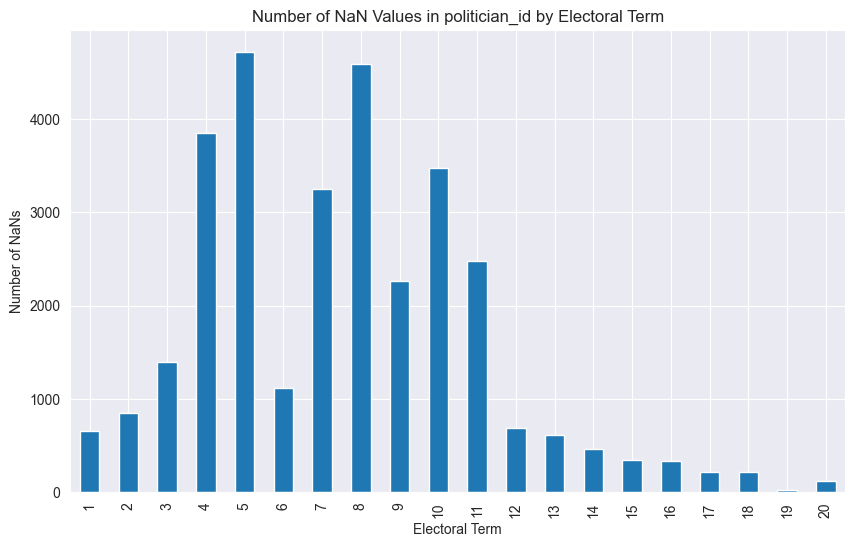

In [61]:
# Step 1: Check for NaN values in the 'politician_id' column
content_filled['politician_id_isnull'] = content_filled['politician_id'].isnull()

# Step 2: Group by 'electoral_term' and sum the NaN counts
nans_by_electoral_term = content_filled.groupby('electoral_term')['politician_id_isnull'].sum()

#print number of all nans
print(content_filled['politician_id_isnull'].sum())

# Step 3: Plot the result as a bar graph
nans_by_electoral_term.plot(kind='bar', figsize=(10,6))
plt.title('Number of NaN Values in politician_id by Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Number of NaNs')
plt.show()

# In the preiod of interest, almost all politician IDs are there

In [62]:
# calculate again percentage of missing politician ids in whole df
politician_id_missing = content_filled['politician_id'].isnull().sum()
politician_id_total = len(content_filled)
politician_id_missing_percentage = politician_id_missing / politician_id_total * 100
print(f'Missing politician_id: {politician_id_missing} ({politician_id_missing_percentage:.2f}%)')


Missing politician_id: 31697 (3.28%)


The amount of rows without politician IDs in our periods of interest is very low. We will procees without trying to fill them further,

In [63]:
content_filled2 = content_filled.copy()
content_filled2.drop(columns=['politician_id_isnull'], inplace=True)

# show where faction_id in na
content_filled2[content_filled2['faction_id'].isnull()]

# fill faction id based on politician id and electoral term
content_filled2 = pd.merge(content_filled2, politicians[['ui', 'faction_id', 'electoral_term']], how='left',
                    left_on=['politician_id', 'electoral_term'], right_on=['ui', 'electoral_term'])

# if faction_id_x is na, fill with faction_id_y
content_filled2['faction_id_x'] = content_filled2['faction_id_x'].fillna(content_filled2['faction_id_y'])
content_filled2.drop(columns=['ui', 'faction_id_y'], inplace=True)
content_filled2.rename(columns={'faction_id_x': 'faction_id'}, inplace=True)

In [64]:
content_filled.isnull().sum()

id                           0
electoral_term               0
session                      0
first_name                   0
document_url                 0
last_name                    0
faction_id              604628
position_short           41512
position_long            58908
politician_id            31697
top_item                640052
top_title               640052
speech_content               0
date                         0
politician_id_isnull         0
dtype: int64

In [65]:
# Step 1: Create a summary DataFrame with the first non-NaN position for each politician and electoral term
summary_positions = content_filled2.groupby(['electoral_term', 'politician_id']).agg({
    'position_short': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'position_long': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None
}).reset_index()

# Step 2: Merge this summary back to the original DataFrame to update NaNs
content_filled2 = content_filled2.merge(summary_positions, on=['electoral_term', 'politician_id'], suffixes=('', '_summary'), how='left')

# Step 3: Use the summary columns to fill NaN values in the original columns
content_filled2['position_short'].fillna(content_filled2['position_short_summary'], inplace=True)
content_filled2['position_long'].fillna(content_filled2['position_long_summary'], inplace=True)

# Step 4: Drop the summary columns (clean-up)
content_filled2.drop(columns=['position_short_summary', 'position_long_summary'], inplace=True)

# Display the updated DataFrame
content_filled2.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640746000.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640746000.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640746000.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-640746000.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640746000.0


In [66]:
# replace all -1 with NaN
content_filled2.replace(-1, np.nan, inplace=True)

print(content_filled2.isnull().sum())


id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id         48453
position_short      1173
position_long      57852
politician_id      31697
top_item          640052
top_title         640052
speech_content         0
date                   0
dtype: int64


In [67]:
factions = factions_raw.drop_duplicates(subset=['id'])

content_merged = content_filled2.merge(factions[['id', 'abbreviation']], left_on='faction_id', right_on='id', how='left')
content_merged.drop(columns=['id_y'], inplace=True)
content_merged.rename(columns={'abbreviation': 'faction', 'id_x':'id'}, inplace=True)

In [68]:
# show all where politician id starts with 9
content_merged[content_merged['politician_id'].astype(str).str.startswith('9')]


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction
846366,1000638,19,112,franziska,https://dip21.bundestag.de/dip21/btp/19/19112.pdf,giffey,NaN,Minister,"Bundesministerin für Familie, Senioren, Frauen...",999990071.0,Einzelplan 17,,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,1.568246e+09,NaN
846480,1000752,19,115,svenja,https://dip21.bundestag.de/dip21/btp/19/19115.pdf,schulze,NaN,Minister,"Bundesministerin für Umwelt, Naturschutz und n...",999990074.0,Zusatzpunkt 2,Vereinbarte Debatte: Klimaschutzprogramm 2030,Herr Präsident! Sehr geehrte Damen und Herren ...,1.569456e+09,NaN
846769,1001041,19,115,annegret,https://dip21.bundestag.de/dip21/btp/19/19115.pdf,kramp-karrenbauer,NaN,Minister,Bundesministerin der Verteidigung,999990083.0,Zusatzpunkt 12,Antrag der Bundesregierung: Einsatz bewaffnete...,Vielen Dank. – Herr Präsident! Meine sehr geeh...,1.569456e+09,NaN
847041,1001313,19,141,benjamin-immanuel,https://dip21.bundestag.de/dip21/btp/19/19141.pdf,hoff,NaN,Minister,Minister (Thüringen),999990091.0,Tagesordnungspunkt 19,Unterrichtung durch die Bundesregierung: Agrar...,Herr Präsident! Sehr geehrte Damen und Herren!...,1.579219e+09,NaN
848286,1002558,19,184,sylvia,https://dip21.bundestag.de/dip21/btp/19/19184.pdf,lehmann,NaN,None,None,999990088.0,Tagesordnungspunkt 29,Zweite und dritte Beratung des von der Bundesr...,Der AfD wünschen wir wenig nahestehende Person...,1.602202e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965314,1119586,20,27,svenja,https://dip21.bundestag.de/dip21/btp/20/20027.pdf,schulze,NaN,Minister,Bundesministerin für wirtschaftliche Zusammena...,999990074.0,Tagesordnungspunkt 3,Vereinbarte Debatte zum 30. Jahrestag des Krie...,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,1.649203e+09,NaN
965573,1119845,20,11,anne,https://dip21.bundestag.de/dip21/btp/20/20011.pdf,spiegel,NaN,Minister,"Bundesministerin für Familie, Senioren, Frauen...",999990122.0,Tagesordnungspunkt 2,Vereinbarte Debatte zur Politik der Bundesregi...,Sehr geehrte Frau Präsidentin! Sehr geehrte Ab...,1.642032e+09,NaN
965689,1119961,20,11,klara,https://dip21.bundestag.de/dip21/btp/20/20011.pdf,geywitz,NaN,Minister,"Bundesministerin für Wohnen, Stadtentwicklung ...",999990120.0,Tagesordnungspunkt 2,Vereinbarte Debatte zur Politik der Bundesregi...,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,1.642032e+09,NaN
965865,1120137,20,29,clara,https://dip21.bundestag.de/dip21/btp/20/20029.pdf,bünger,NaN,None,None,999990123.0,Tagesordnungspunkt 22,"Antrag der Abgeordneten Dr. Gottfried Curio, C...",Sehr geehrter Herr Präsident! Liebe Kolleginne...,1.649376e+09,NaN


### 2.4 Sorting

In [69]:
# Sort dataframe by date and id
content_df = content_merged.sort_values(by=['date', 'id'])
content_df

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-6.407460e+08,CDU/CSU
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-6.407460e+08,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-6.407460e+08,CDU/CSU
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-6.407460e+08,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-6.407460e+08,CDU/CSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921650,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0.0,Member of Parliament,None,11004891.0,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Sehr geehrte Frau Präsidentin! Meine Damen und...,1.727222e+09,AfD
921651,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7.0,Presidium of Parliament,Vizepräsidentin,11003206.0,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Herr Abgeordneter.,1.727222e+09,DIE LINKE.
921652,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18.0,Member of Parliament,None,11004891.0,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Vielen Dank.,1.727222e+09,Fraktionslos
921653,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7.0,Presidium of Parliament,Vizepräsidentin,11003206.0,Tagesordnungspunkt 6,"Antrag der Abgeordneten René Springer, Jürgen ...",Für die SPD-Fraktion hat die Kollegin Angelika...,1.727222e+09,DIE LINKE.


### 2.5 Data types

In [70]:
# show datatypes of content_df
content_df.dtypes

id                  int64
electoral_term      int32
session             int32
first_name         object
document_url       object
last_name          object
faction_id        float64
position_short     object
position_long      object
politician_id     float64
top_item           object
top_title          object
speech_content     object
date              float64
faction            object
dtype: object

In [71]:
#connvert date to date without time
content_df['date'] = pd.to_datetime(content_df['date'], unit='s').dt.date

#convert politician_id to int if it is not nan
content_df['politician_id'] = content_df['politician_id'].fillna(-1)
content_df['politician_id'] = content_df['politician_id'].astype(int)

#convert faction_id to int if it is not nan
content_df['faction_id'] = content_df['faction_id'].fillna(-1)
content_df['faction_id'] = content_df['faction_id'].astype(int)

# show datatypes of content_df
content_df.dtypes


id                 int64
electoral_term     int32
session            int32
first_name        object
document_url      object
last_name         object
faction_id         int64
position_short    object
position_long     object
politician_id      int64
top_item          object
top_title         object
speech_content    object
date              object
faction           object
dtype: object

In [72]:
#show data types of politicians df
politicians.dtypes

#convert faction_id to int
politicians['faction_id'] = politicians['faction_id'].fillna(-1)
politicians['faction_id'] = politicians['faction_id'].astype(int)

In [73]:
contributions_df = contributions_raw.copy()
# change text position and speech id to int
contributions_df['text_position'] = contributions_df['text_position'].astype(int)
contributions_df['speech_id'] = contributions_df['speech_id'].astype(int)

# show data types of contributions df
contributions_df.dtypes

text_position     int64
content          object
speech_id         int64
dtype: object

### 2.6 Cleaning of the content and agenda Column

In [74]:
content_df.speech_content = content_df.speech_content.replace('\u00A0', ' ', regex=True)
content_df.speech_content = content_df.speech_content.replace('\u00AD', ' ', regex=True)
content_df.speech_content = content_df.speech_content.replace('\(\{\d+\}\)', '', regex=True)
content_df.speech_content = content_df.speech_content.replace('\n', ' ', regex=True)
content_df.speech_content = content_df.speech_content.str.strip()

# Remove extra spaces by replacing multiple spaces with a single space
content_df.speech_content = content_df.speech_content.replace('\s+', ' ', regex=True)  # Replace multiple spaces with a single space

# Trim leading and trailing spaces
content_df.speech_content = content_df.speech_content.str.strip()

In [75]:
# clean the top_title column as above
content_df.top_title = content_df.top_title.replace('\u00A0', ' ', regex=True)
content_df.top_title = content_df.top_title.replace('\u00AD', ' ', regex=True)
content_df.top_title = content_df.top_title.replace('\(\{\d+\}\)', '', regex=True)
content_df.top_title = content_df.top_title.replace('\n', ' ', regex=True)
content_df.top_title = content_df.top_title.str.strip()

### 2.7 Inspection

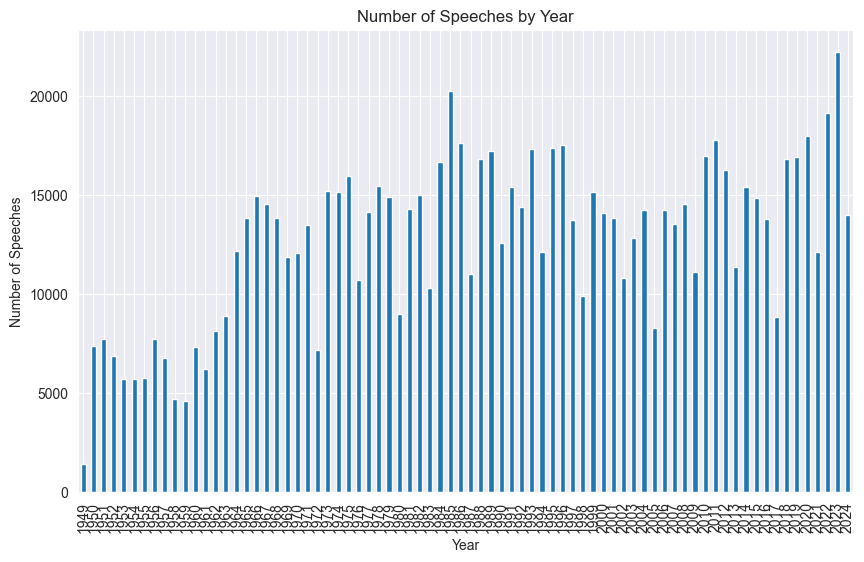

In [76]:
# show bar chart wit amount of rows per year
content_df['date'] = pd.to_datetime(content_df['date'])
content_df['year'] = content_df['date'].dt.year
content_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Number of Speeches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.show()

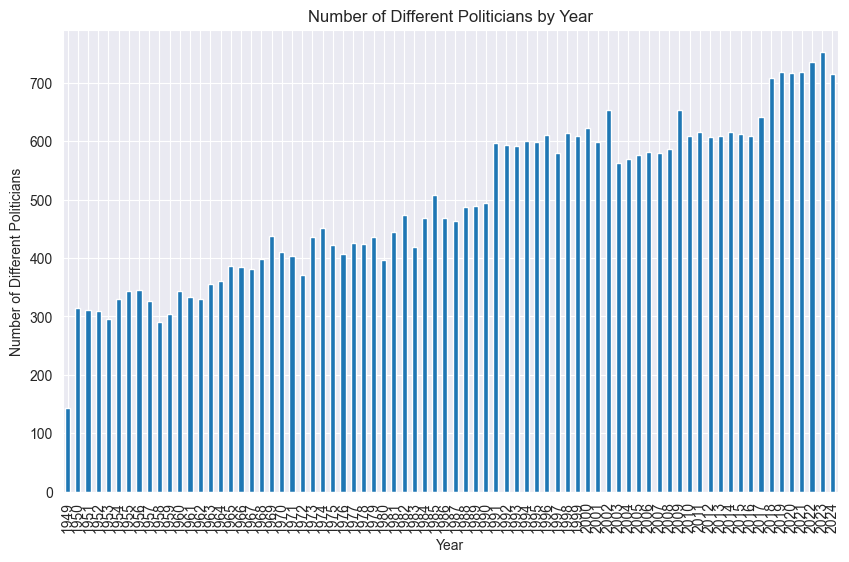

In [77]:
# show bar chart with number of different politicians per year
content_df.groupby('year')['politician_id'].nunique().plot(kind='bar', figsize=(10,6))
plt.title('Number of Different Politicians by Year')
plt.xlabel('Year')
plt.ylabel('Number of Different Politicians')
plt.show()


In [78]:
# show distribution of position long in electoral period 20 in table
content_df[content_df['electoral_term'] == 20]['position_long'].value_counts()


position_long
Vizepräsidentin                                                                                                                                           16762
Vizepräsident                                                                                                                                              4438
Präsidentin                                                                                                                                                4078
Bundesminister der Finanzen                                                                                                                                 590
Bundesminister für Wirtschaft und Klimaschutz                                                                                                               213
                                                                                                                                                          ...  
Parl. Staatssekretärin bei

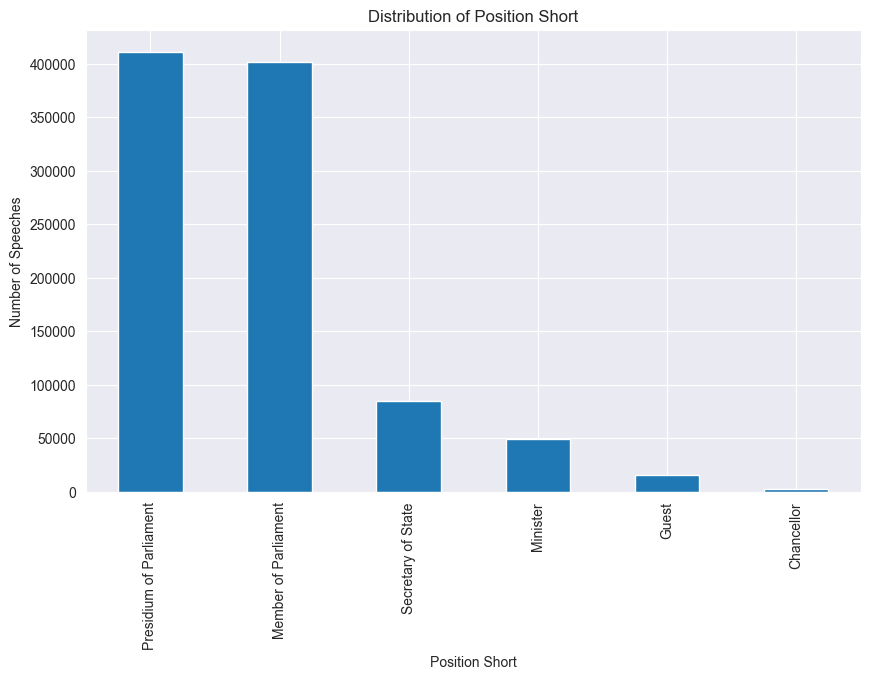

In [79]:
# show distribution of position short in bar chart
content_df['position_short'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Position Short')
plt.xlabel('Position Short')
plt.ylabel('Number of Speeches')
plt.show()

In [80]:
# minnimum and maximum date
print(content_df['date'].min())
print(content_df['date'].max())

1949-09-11 00:00:00
2024-09-25 00:00:00


### 2.9 Safe DFs for easier computation later

In [81]:
# safe content
content_df.to_pickle('content_df.pkl')
politicians.to_pickle('politicians_df.pkl')
contributions_df.to_pickle('contributions_df.pkl')

## 3. Feature enriching

In [82]:
# Load from pickle
content_df = pd.read_pickle('content_df.pkl')
politicians_df = pd.read_pickle('politicians_df.pkl')
contributions_df = pd.read_pickle('contributions_df.pkl')

In [83]:
content_df_features = content_df.copy()

#speech length
content_df_features['speech_length'] = content_df_features['speech_content'].str.len()

# age of politician (merge with politician df first)
content_df_features = pd.merge(content_df_features, politicians_df[['ui','electoral_term', 'birth_date']], how='left',
                    left_on=['politician_id','electoral_term'], right_on=['ui', 'electoral_term'])
content_df_features.drop(columns=['ui'], inplace=True)
content_df_features['birth_date'] = pd.to_datetime(content_df_features['birth_date'], errors='coerce')
content_df_features['date'] = pd.to_datetime(content_df_features['date'], errors='coerce')
content_df_features['age'] = (content_df_features['date'] - content_df_features['birth_date']).dt.days // 365
content_df_features.drop(columns=['birth_date'], inplace=True)

# genger (merge with politician df first)
content_df_features = pd.merge(content_df_features, politicians_df[['ui','electoral_term', 'gender']], how='left',
                    left_on=['politician_id', 'electoral_term'], right_on=['ui','electoral_term'])
content_df_features.drop(columns=['ui'], inplace=True)


# politicians tenure (time difference of first speech)
content_df_features['first_speech'] = content_df_features.groupby('politician_id')['date'].transform('min')
content_df_features['tenure'] = (content_df_features['date'] - content_df_features['first_speech']).dt.days/365
content_df_features.drop(columns=['first_speech'], inplace=True)

content_df_features.head()




,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.0


In [103]:
# to pickle
content_df_features.to_pickle('content_df_features.pkl')
#len(content_df_features)
content_df_features.to_csv('content_df_features.csv')

## 4. Analysis of Electoral Terms

### 4.1 Development of Debates per Electoral Term

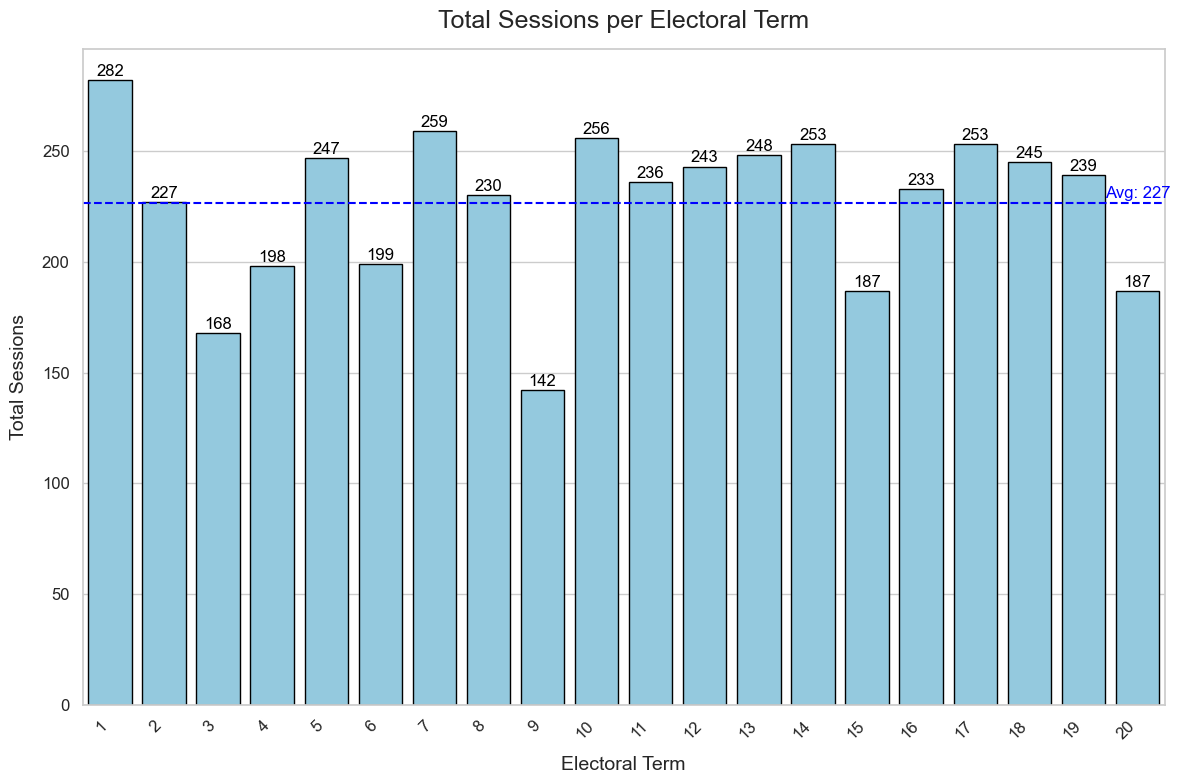

In [85]:
# Group by electoral term and find the maximum session
max_sessions = content_df_features.groupby('electoral_term')['session'].max().reset_index()

# Calculate the average session count across all electoral terms
average_session_count = max_sessions['session'].mean()

# Set up the Seaborn style
sns.set(style="whitegrid")

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='electoral_term', y='session', data=max_sessions, ax=ax, color='skyblue', edgecolor='black')

# Styling and labels
plt.title('Total Sessions per Electoral Term', fontsize=18, pad=15)
plt.xlabel('Electoral Term', fontsize=14, labelpad=10)
plt.ylabel('Total Sessions', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display session count on top of each bar
for i, value in enumerate(max_sessions['session']):
    ax.text(i, value + 0.5, f'{value:.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Draw a horizontal line for the overall average
ax.axhline(average_session_count, color='blue', linestyle='--', linewidth=1.5)
ax.text(len(max_sessions) - 1, average_session_count + 1, f'Avg: {average_session_count:.0f}', color='blue', ha='center', va='bottom', fontsize=12)

# Save plot as PNG with high resolution
plt.tight_layout()
fig.savefig('max_sessions_per_electoral_term.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Speaker per Electoral Term

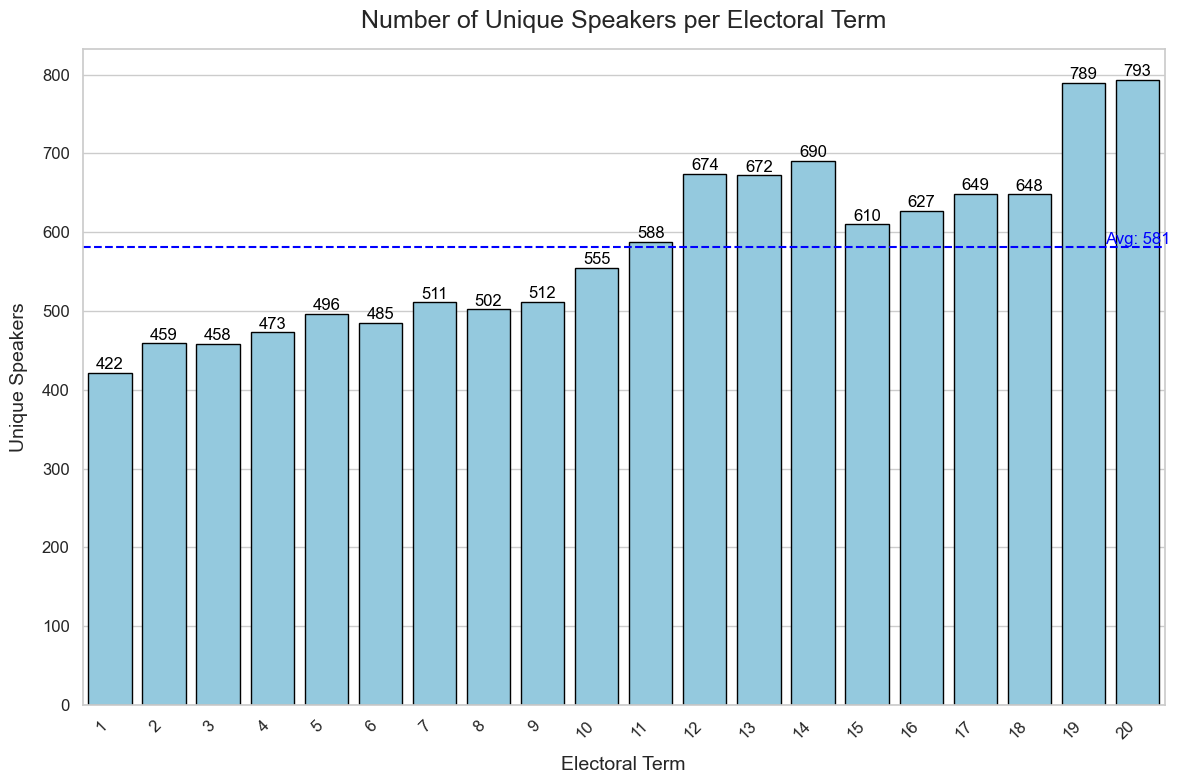

In [86]:
# Group by electoral term and count unique speakers
unique_speakers = content_df_features.groupby('electoral_term')['politician_id'].nunique().reset_index()

# Calculate the average number of unique speakers
average_unique_speakers = unique_speakers['politician_id'].mean()

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='electoral_term', y='politician_id', data=unique_speakers, ax=ax, color='skyblue', edgecolor='black')

# Styling and labels
plt.title('Number of Unique Speakers per Electoral Term', fontsize=18, pad=15)
plt.xlabel('Electoral Term', fontsize=14, labelpad=10)
plt.ylabel('Unique Speakers', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the number of unique speakers on top of each bar
for i, value in enumerate(unique_speakers['politician_id']):
    ax.text(i, value + 1, f'{value:.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Draw a horizontal line for the average unique speakers count
ax.axhline(average_unique_speakers, color='blue', linestyle='--', linewidth=1.5)
ax.text(len(unique_speakers) - 1, average_unique_speakers + 1, f'Avg: {average_unique_speakers:.0f}', color='blue', ha='center', va='bottom', fontsize=12)

# Save plot as PNG with high resolution
plt.tight_layout()
fig.savefig('unique_speakers_per_electoral_term.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Time spoken per electoral term

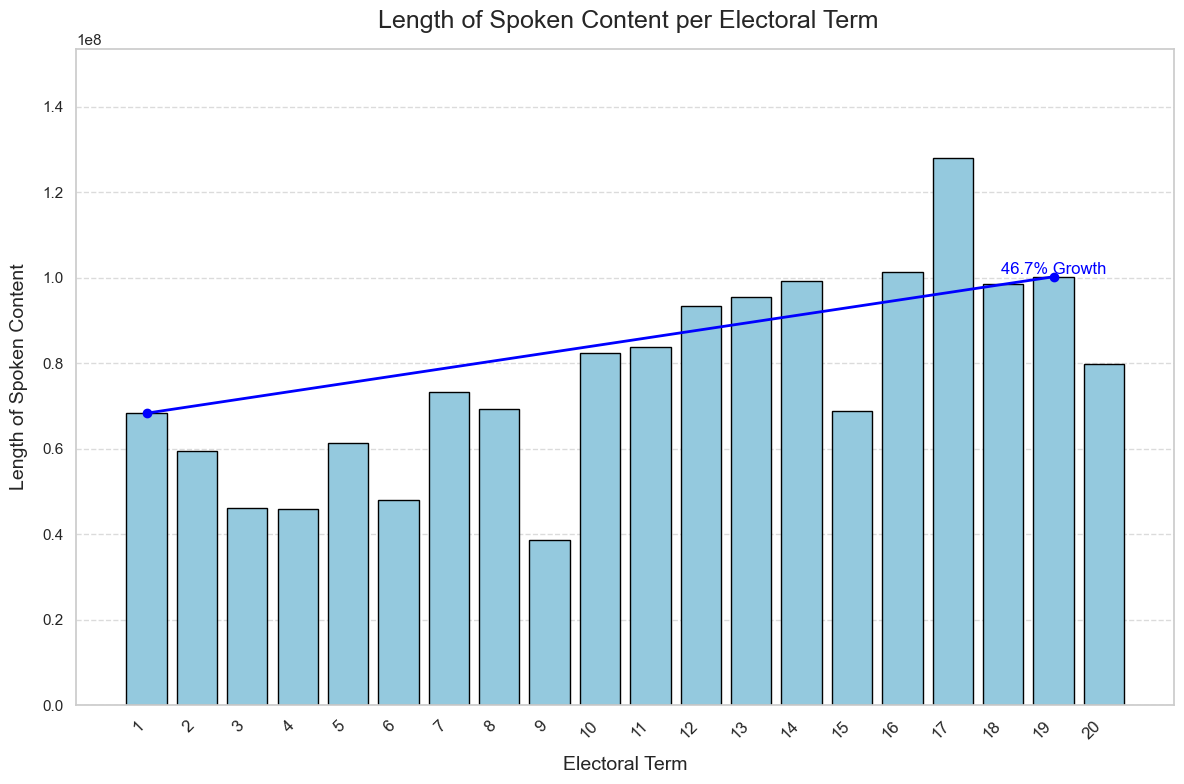

In [87]:
# Calculate the total spoken time per electoral term
time_spoken = content_df_features.groupby('electoral_term')['speech_length'].sum().reset_index()

# Define start and end values for the growth line from term 1 to term 19
start_value = time_spoken['speech_length'].iloc[0]
end_value = time_spoken['speech_length'].iloc[18]  # 19th term
total_growth_percentage = ((end_value - start_value) / start_value) * 100

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot setup with bars and a straight line for the growth trend
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for total spoken time
sns.barplot(x='electoral_term', y='speech_length', data=time_spoken, ax=ax, color='skyblue', edgecolor='black')

# Styling and labels for the bar plot
ax.set_title(' Length of Spoken Content per Electoral Term', fontsize=18, pad=15)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=10)
ax.set_ylabel('Length of Spoken Content', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Plot the straight growth line from term 1 to term 19 only
ax.plot([0, 18], [start_value, end_value], color='blue', linestyle='-', linewidth=2, marker='o')

# Set y-axis limit for clear visibility
ax.set_ylim(0, max(time_spoken['speech_length'].max() * 1.2, end_value * 1.2))

# Add a final label indicating the total growth percentage at the end of the line
ax.text(18, end_value, f'{total_growth_percentage:.1f}% Growth', color='blue', ha='center', va='bottom', fontsize=12)

# Customize gridlines for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
fig.savefig('time_spoken_per_electoral_term_with_growth_trend.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Parties per Electoral Term

#### 4.3.1 Speakers per party

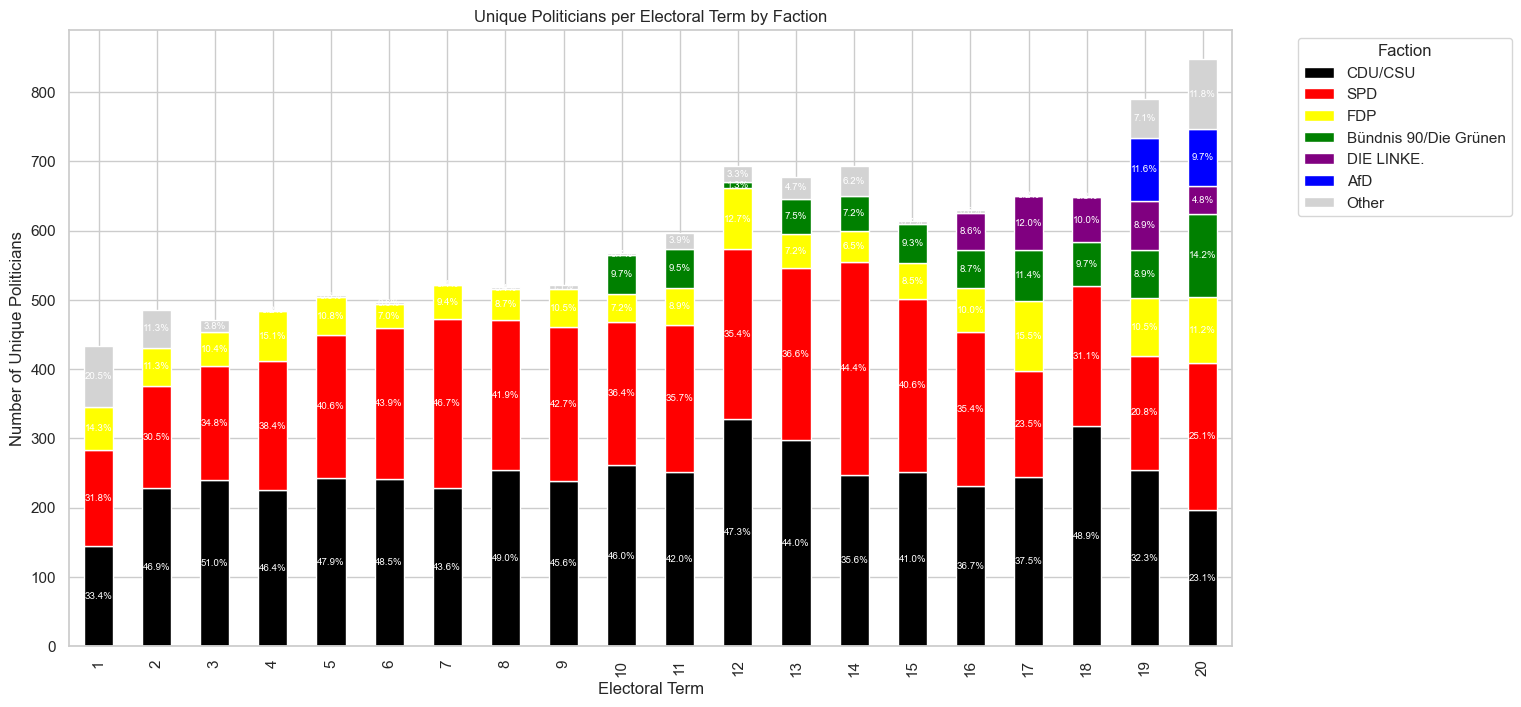

In [88]:
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'purple',
    'AfD': 'blue',
}
# create a new dataframe, mark all factions that are not in color map as other
content_df_factions = content_df_features.copy()
content_df_factions['faction'] = content_df_factions['faction'].apply(lambda x: x if x in color_map else 'Other')

# Create a pivot table to count unique politician IDs per electoral term and faction
unique_politicians_per_faction = content_df_factions.pivot_table(index='electoral_term', columns='faction', values='politician_id', aggfunc=pd.Series.nunique, fill_value=0)

# sort by largest faction
unique_politicians_per_faction = unique_politicians_per_faction[unique_politicians_per_faction.sum().sort_values(ascending=False).index]

# always keep other at the bottom
unique_politicians_per_faction = unique_politicians_per_faction[[x for x in unique_politicians_per_faction.columns if x != 'Other'] + ['Other']]


# Plot the stacked bar chart with the individual color map, leaving all others in light grey

fig, ax = plt.subplots(figsize=(15, 8))
unique_politicians_per_faction.plot(
    kind='bar',
    stacked=True,
    color=[color_map.get(x, 'lightgrey') for x in unique_politicians_per_faction.columns],
    ax=ax
)
plt.title('Unique Politicians per Electoral Term by Faction')
plt.xlabel('Electoral Term')
plt.ylabel('Number of Unique Politicians')
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding percentages to each bar segment
for i, term in enumerate(unique_politicians_per_faction.index):
    total = unique_politicians_per_faction.loc[term].sum()
    for j, (faction, count) in enumerate(unique_politicians_per_faction.loc[term].items()):
        if count > 0:
            ax.text(i, unique_politicians_per_faction.loc[term, :faction].sum() - count / 2,
                    f"{count / total:.1%}", ha='center', va='center', color="white", fontsize=7)

plt.show()

#### 4.3.2 Speaking time per party

In [89]:
content_df_features.position_short.unique()

# of the content df, filter out all 'Presidium of Parliament' 
content_without_moderation = content_df_features[content_df_features.position_short != 'Presidium of Parliament']

# Map factions to 'Other' if not in color_map
content_without_moderation['faction'] = content_without_moderation['faction'].apply(lambda x: x if x in color_map else 'Other')

# Step 2: Group by electoral term and faction, then sum speech length
speaking_per_party = content_without_moderation.groupby(['electoral_term', 'faction'])['speech_length'].sum().unstack(fill_value=0)

In [90]:
speaking_per_party.tail()

faction,AfD,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,FDP,Other,SPD
electoral_term,,,,,,,
16,0,11957143,26592534,11334134,12776497,476284,27936617
17,0,15035497,40991791,14925675,19412152,287619,25552490
18,0,14216501,36398263,12791924,0,251241,24694290
19,12665675,10149963,31423150,9490919,10594481,1964497,20086424
20,8424631,12333552,18064868,4701098,10384958,4748217,19088829


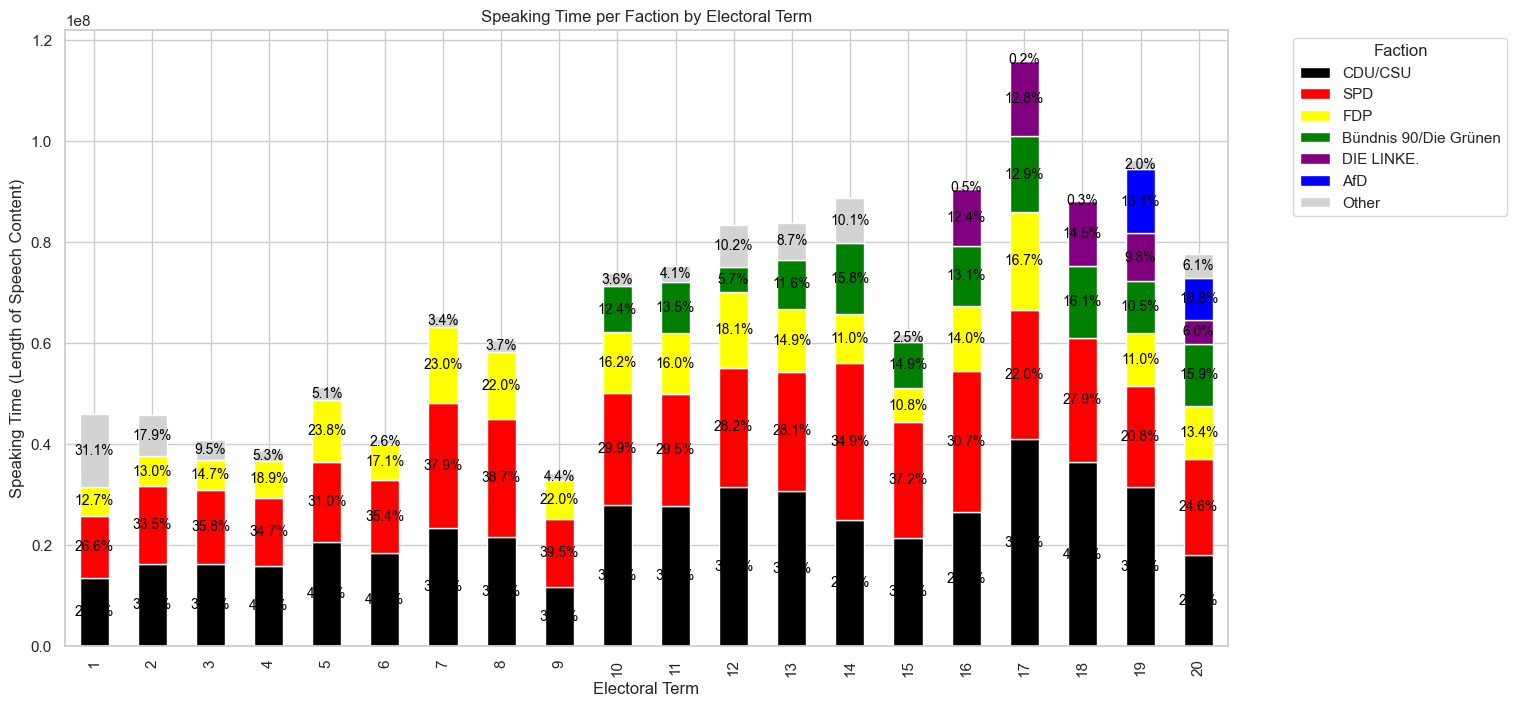

In [91]:
speaking_per_party = speaking_per_party[speaking_per_party.sum().sort_values(ascending=False).index]
if 'Other' in speaking_per_party.columns:
    cols = [col for col in speaking_per_party.columns if col != 'Other'] + ['Other']
    speaking_per_party = speaking_per_party[cols]

# Step 4: Plot stacked bar chart with color mapping
fig, ax = plt.subplots(figsize=(15, 8))
speaking_per_party.plot(
    kind='bar',
    stacked=True,
    color=[color_map.get(faction, 'lightgrey') for faction in speaking_per_party.columns],
    ax=ax,
    title='Speaking Time per Faction by Electoral Term'
)

# Labels and legend
plt.xlabel('Electoral Term')
plt.ylabel('Speaking Time (Length of Speech Content)')
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 5: Add percentage labels
for i, term in enumerate(speaking_per_party.index):
    total = speaking_per_party.loc[term].sum()
    cumulative_height = 0
    for faction, value in speaking_per_party.loc[term].items():
        if value > 0:
            cumulative_height += value
            ax.text(
                i, cumulative_height - value / 2,
                f"{value / total:.1%}", ha='center', va='center', color="black", fontsize=10
            )

plt.show()

#### 4.3.3 All-In-One Party comparison

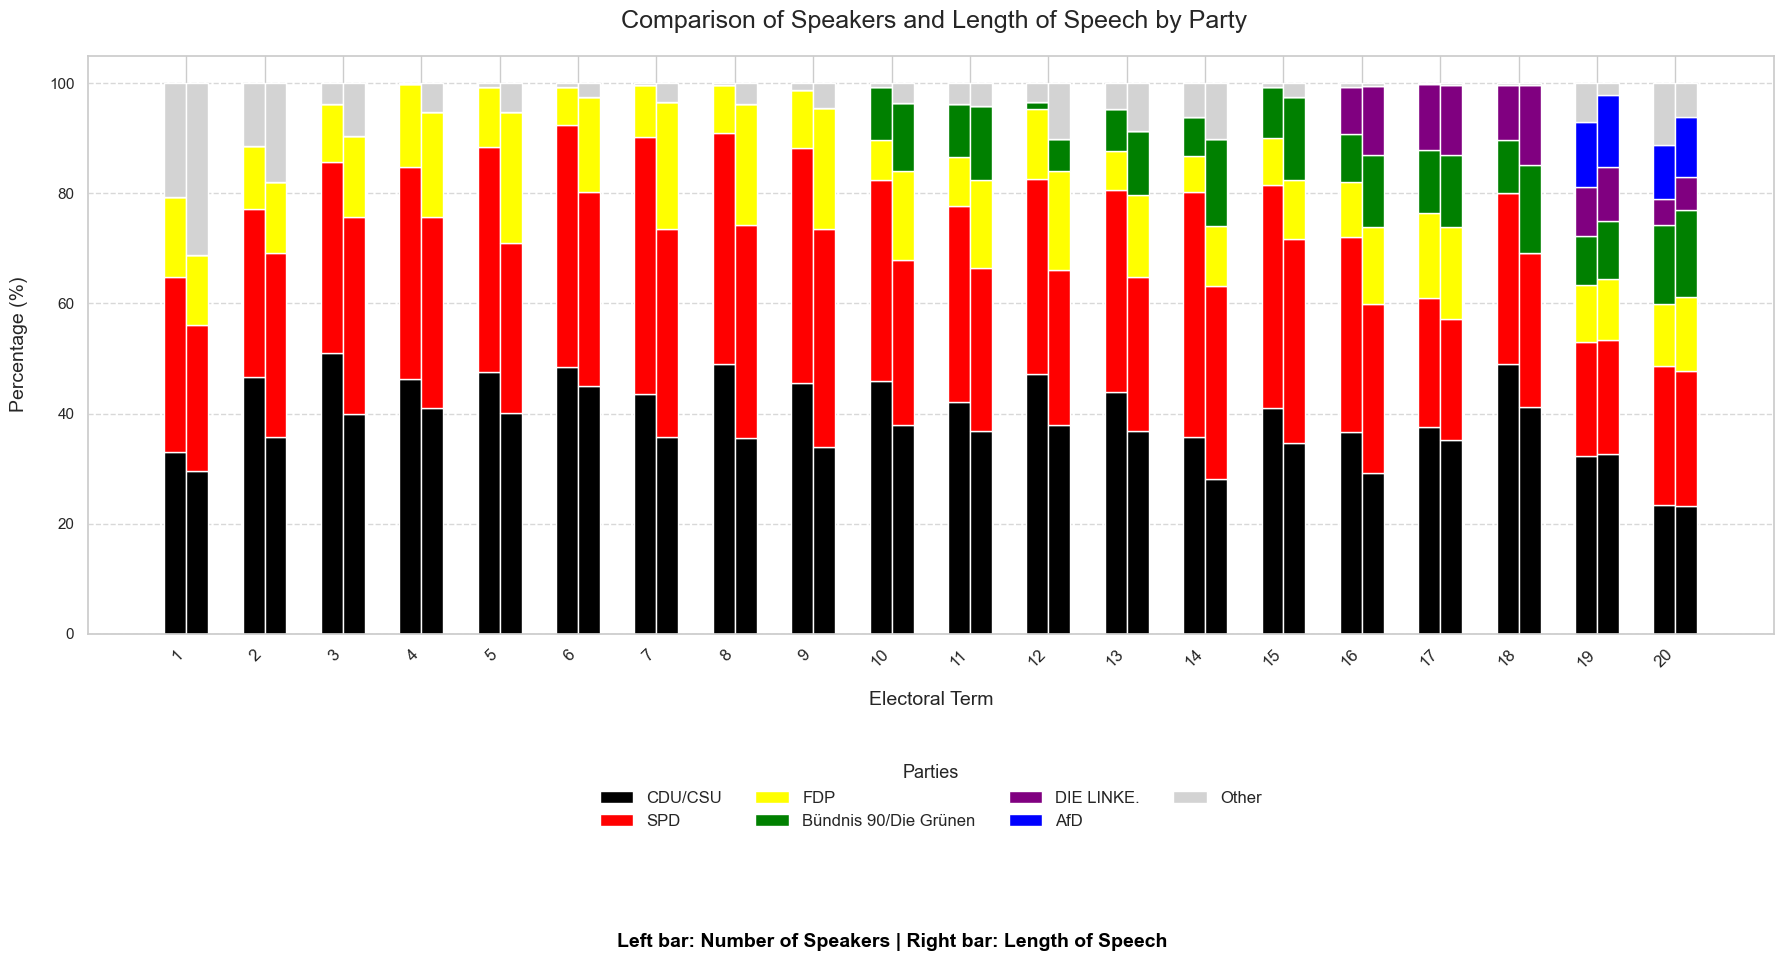

In [92]:
content_without_moderation = content_df_features[content_df_features.position_short != 'Presidium of Parliament']
content_without_moderation['faction'] = content_without_moderation['faction'].apply(lambda x: x if x in color_map else 'Other')

# Prepare Data for Speaking Time
speaking_per_party = content_without_moderation.groupby(['electoral_term', 'faction'])['speech_length'].sum().unstack(fill_value=0)
speaking_per_party = speaking_per_party[speaking_per_party.sum().sort_values(ascending=False).index]
if 'Other' in speaking_per_party.columns:
    cols = [col for col in speaking_per_party.columns if col != 'Other'] + ['Other']
    speaking_per_party = speaking_per_party[cols]

# Prepare Data for Number of Speakers
unique_speakers = content_without_moderation.groupby(['electoral_term', 'faction'])['politician_id'].nunique().unstack(fill_value=0)
unique_speakers = unique_speakers[speaking_per_party.columns]  # Align columns with speaking time

# Calculate percentages for both metrics
speaking_per_party_percent = speaking_per_party.div(speaking_per_party.sum(axis=1), axis=0) * 100
unique_speakers_percent = unique_speakers.div(unique_speakers.sum(axis=1), axis=0) * 100

# Plot setup
fig, ax = plt.subplots(figsize=(18, 10))
width = 0.35  # Width of each bar set
gap_between_bars = 0.25  # Slightly increase gap for better clarity

# Positions for the bars with additional spacing between electoral terms
electoral_terms = np.arange(len(speaking_per_party.index)) * (1 + gap_between_bars)

# Add subtle gridlines for better readability
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.3)

# Plot Number of Speakers
bottom_speakers = np.zeros(len(electoral_terms))
for faction in unique_speakers_percent.columns:
    ax.bar(electoral_terms - width / 2, unique_speakers_percent[faction], width=width, 
           label=faction, color=color_map.get(faction, 'lightgrey'), bottom=bottom_speakers)
    bottom_speakers += unique_speakers_percent[faction]

# Plot Speaking Time
bottom_speaking_time = np.zeros(len(electoral_terms))
for faction in speaking_per_party_percent.columns:
    ax.bar(electoral_terms + width / 2, speaking_per_party_percent[faction], width=width, 
           color=color_map.get(faction, 'lightgrey'), bottom=bottom_speaking_time)
    bottom_speaking_time += speaking_per_party_percent[faction]

# Labels and Legend
ax.set_xticks(electoral_terms)
ax.set_xticklabels(speaking_per_party.index, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=15)
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=15)
ax.set_title(" Comparison of Speakers and Length of Speech by Party", fontsize=18, pad=20)

'''# Adding vertically rotated percentage labels with conditional color for CDU/CSU
for i, term in enumerate(speaking_per_party.index):
    # Number of Speakers
    cumulative_height = 0
    for faction in unique_speakers_percent.columns:
        if unique_speakers_percent.loc[term, faction] > 0:
            cumulative_height += unique_speakers_percent.loc[term, faction]
            label_color = "white" if faction == "CDU/CSU" else "black"
            ax.text(
                i * (1 + gap_between_bars) - width / 2, cumulative_height - unique_speakers_percent.loc[term, faction] / 2,
                f"{unique_speakers_percent.loc[term, faction]:.1f}%", ha='center', va='center', color=label_color, fontsize=10, rotation=90
            )
    
    # Speaking Time
    cumulative_height = 0
    for faction in speaking_per_party_percent.columns:
        if speaking_per_party_percent.loc[term, faction] > 0:
            cumulative_height += speaking_per_party_percent.loc[term, faction]
            label_color = "white" if faction == "CDU/CSU" else "black"
            ax.text(
                i * (1 + gap_between_bars) + width / 2, cumulative_height - speaking_per_party_percent.loc[term, faction] / 2,
                f"{speaking_per_party_percent.loc[term, faction]:.1f}%", ha='center', va='center', color=label_color, fontsize=10, rotation=90
            )'''

# Add a note below the chart to indicate bar meaning
plt.figtext(0.5, 0, "Left bar: Number of Speakers | Right bar: Length of Speech", ha='center', va='center', fontsize=14, color="black", weight='bold')

# Adjust the legend for cleaner appearance and place it at the bottom
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate legend entries
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=12, title="Parties", title_fontsize=13, frameon=False)

# Save plot as PNG
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to fit legend at bottom and ensure y-axis visibility
fig.savefig('speaking_time.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.4 Evolution of Male and female speakers

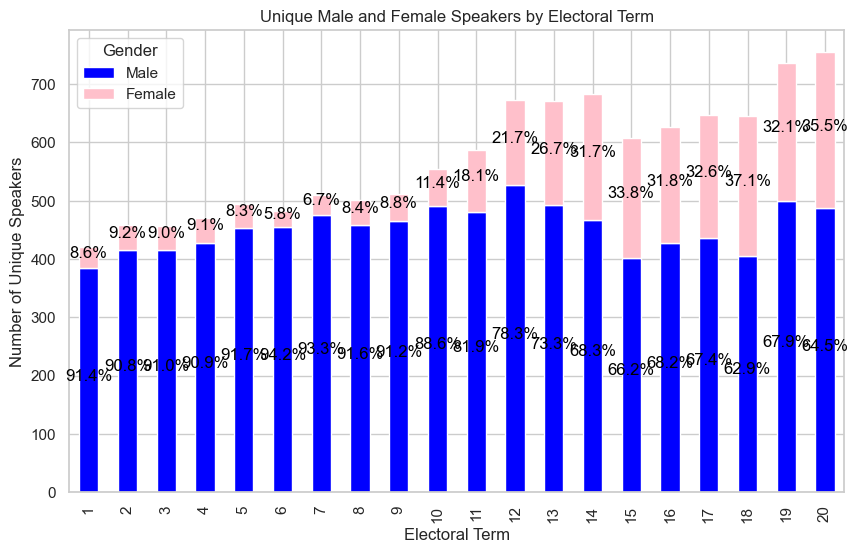

In [93]:
# match gender to content_df based on politicians id in politicians df

unique_speakers = content_df_features.groupby(['electoral_term', 'gender'])['politician_id'].nunique().unstack().fillna(0)

# Step 2: Calculate percentage of male and female speakers within each electoral term
unique_speakers_percent = unique_speakers.div(unique_speakers.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
unique_speakers.plot(kind='bar', stacked=True, color=['blue', 'pink'], ax=ax)
plt.title('Unique Male and Female Speakers by Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Number of Unique Speakers')
plt.legend(['Male', 'Female'], title="Gender")

# Adding percentage labels for each gender within each electoral term
for i, term in enumerate(unique_speakers.index):
    male_count = unique_speakers.iloc[i, 0]
    female_count = unique_speakers.iloc[i, 1]
    male_percent = unique_speakers_percent.iloc[i, 0]
    female_percent = unique_speakers_percent.iloc[i, 1]
    
    # Place percentage labels at the center of each stacked section
    ax.text(i, male_count / 2, f'{male_percent:.1f}%', ha='center', color='black')
    ax.text(i, male_count + female_count / 2, f'{female_percent:.1f}%', ha='center', color='black')

plt.show()

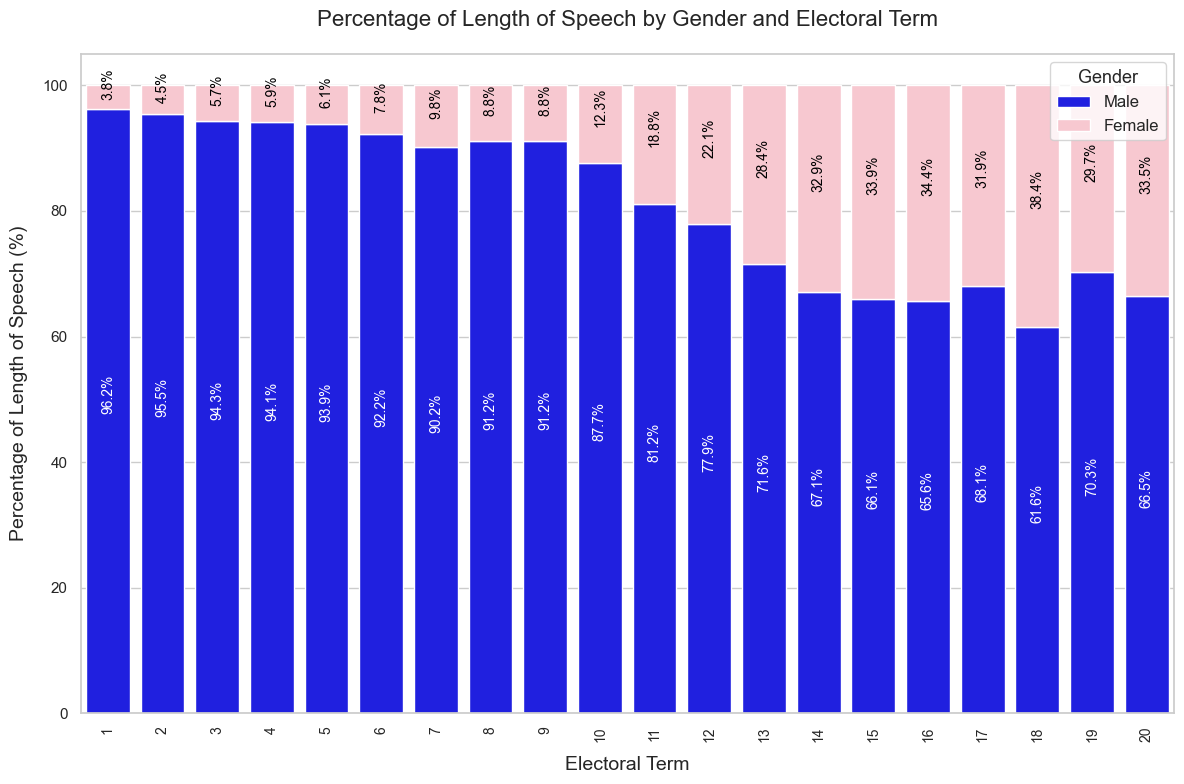

In [94]:
# Sample Data Preparation
speaking_time = content_df_features.groupby(['electoral_term', 'gender'])['speech_length'].sum().unstack().fillna(0)

# Calculate percentage of speaking time for each gender within each electoral term
speaking_time_percent = speaking_time.div(speaking_time.sum(axis=1), axis=0) * 100

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot setup with stacked bars in Seaborn
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Male and Female percentages as stacked bars
bottom_male = np.zeros(len(speaking_time_percent.index))
sns.barplot(x=speaking_time_percent.index, y=speaking_time_percent['männlich'], color='blue', ax=ax, label='Male', bottom=bottom_male)
bottom_male += speaking_time_percent['männlich']
sns.barplot(x=speaking_time_percent.index, y=speaking_time_percent['weiblich'], color='pink', ax=ax, label='Female', bottom=bottom_male)

# Styling and labels
ax.set_title('Percentage of Length of Speech by Gender and Electoral Term', fontsize=16, pad=20)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Length of Speech (%)', fontsize=14, labelpad=10)
plt.xticks(rotation=90, ha='center', fontsize=10)

# Add percentage labels for each gender within each electoral term
for i, term in enumerate(speaking_time_percent.index):
    male_time_percent = speaking_time_percent.loc[term, 'männlich']
    female_time_percent = speaking_time_percent.loc[term, 'weiblich']
    
    # Place percentage labels in the center of each stacked section
    ax.text(i, male_time_percent / 2, f'{male_time_percent:.1f}%', ha='center', color='white', fontsize=10, rotation=90)
    ax.text(i, male_time_percent + female_time_percent / 2, f'{female_time_percent:.1f}%', ha='center', color='black', fontsize=10, rotation=90)

# Legend
plt.legend(title="Gender", loc='upper right', fontsize=12, title_fontsize=13)

# Save plot as PNG with high resolution
plt.tight_layout()
plt.savefig("percentage_of_speaking_time_by_gender_seaborn.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Analysis of Electoral term 20

### 5.1 Age of speakers

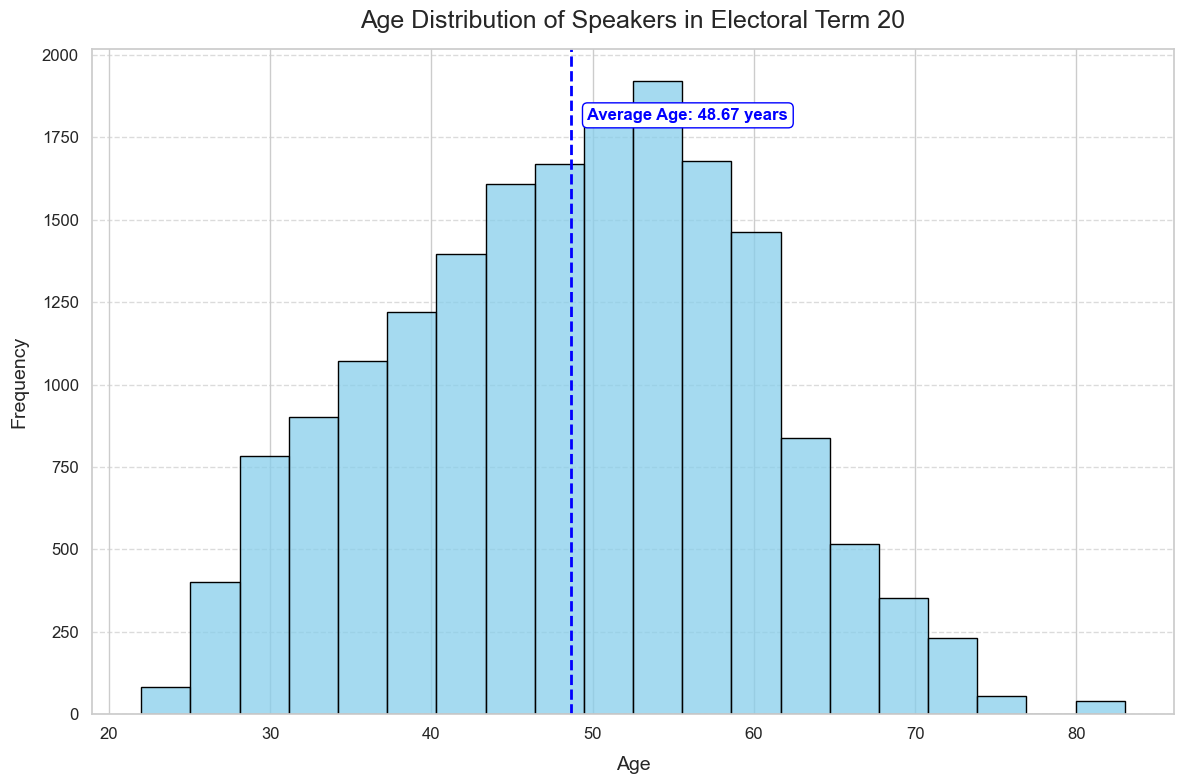

Average Age of Speakers in Electoral Term 20: 48.67 years
Youngest Speaker: emily vontz (22.0 years)
Oldest Speaker: alexander gauland (83.0 years)


In [95]:
# Filter data for electoral term 20 only and remove duplicate entries
content_term_20 = content_df_features[content_df_features['electoral_term'] == 20].copy()
content_term_20.drop_duplicates(subset=['politician_id','electoral_term', 'session'], keep='first', inplace=True)
content_term_20 = content_term_20.dropna(subset=['age'])  # Drop rows with missing age

# Calculate average age
average_age = content_term_20['age'].mean()

# Set up Seaborn style and plot the histogram
plt.figure(figsize=(12, 8))
sns.histplot(content_term_20['age'], bins=20, kde=False, color="skyblue", edgecolor='black')

# Add average age line
plt.axvline(average_age, color='blue', linestyle='--', linewidth=2)

# Annotate the average age on the plot
plt.text(average_age + 1, plt.gca().get_ylim()[1] * 0.9, f'Average Age: {average_age:.2f} years', color='blue', 
         fontsize=12, ha='left', va='center', fontweight='bold', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

# Title and axis labels
plt.title('Age Distribution of Speakers in Electoral Term 20', fontsize=18, pad=15)
plt.xlabel('Age', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
plt.savefig("age_distribution_electoral_term_20.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# Print the average age in the console for reference
print(f'Average Age of Speakers in Electoral Term 20: {average_age:.2f} years')

# print the minimum and maximum age and the name of the youngest and oldest speaker
youngest_speaker = content_term_20.loc[content_term_20['age'].idxmin()]
oldest_speaker = content_term_20.loc[content_term_20['age'].idxmax()]

print(f'Youngest Speaker: {youngest_speaker["first_name"]} {youngest_speaker["last_name"]} ({youngest_speaker["age"]} years)')
print(f'Oldest Speaker: {oldest_speaker["first_name"]} {oldest_speaker["last_name"]} ({oldest_speaker["age"]} years)')


### 5.2 Tenure

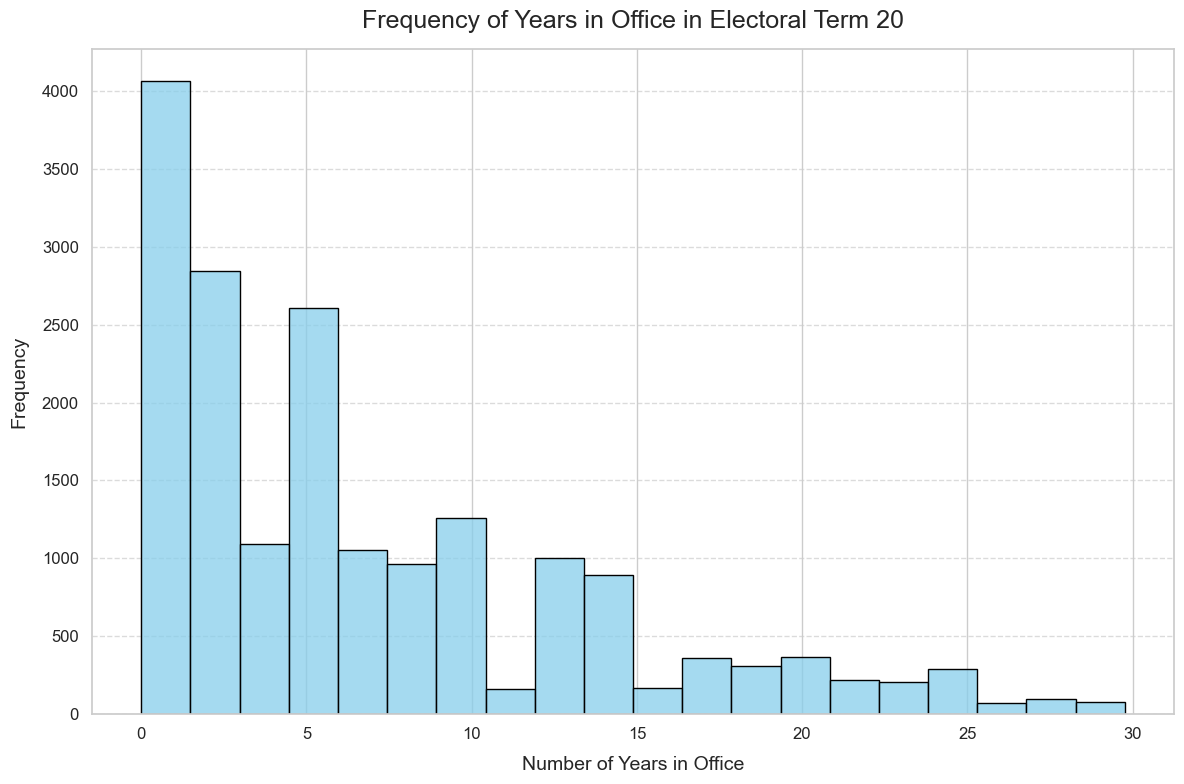

309


In [96]:
# Remove duplicates of date and politician_id, filter for electoral term 20
tenure_df_frequency = content_df_features.drop_duplicates(subset=['date', 'politician_id'])
tenure_df_frequency_20 = tenure_df_frequency[tenure_df_frequency['electoral_term'] == 20]

# Remove outliers (tenure greater than 30 years)
tenure_df_frequency_20 = tenure_df_frequency_20[tenure_df_frequency_20['tenure'] < 30]

# Set up Seaborn style and plot the histogram
plt.figure(figsize=(12, 8))
sns.histplot(tenure_df_frequency_20['tenure'], bins=20, color="skyblue", edgecolor="black")

# Title and axis labels
plt.title('Frequency of Years in Office in Electoral Term 20', fontsize=18, pad=15)
plt.xlabel('Number of Years in Office', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
plt.savefig("frequency_of_years_in_office_electoral_term_20.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# calculate and print amount where tenure is 0
print(tenure_df_frequency_20[tenure_df_frequency_20['tenure'] == 0].shape[0])




### 5.3 Speech length

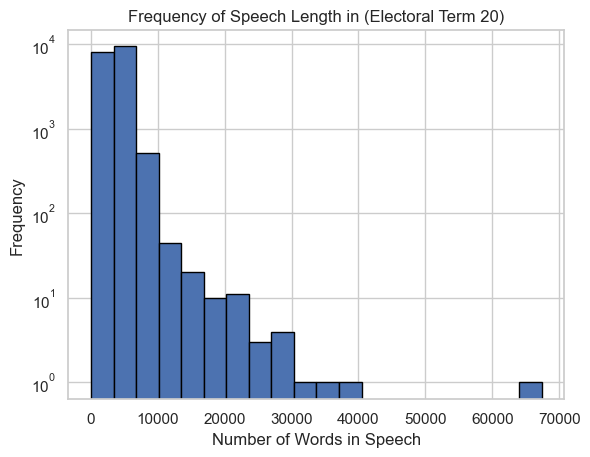

In [97]:
# frequency diagram with speech_length
tenure_df_frequency_20['speech_length'].plot(kind='hist', bins=20, edgecolor='black')
# log y axis
plt.yscale('log')

plt.xlabel('Number of Words in Speech')
plt.ylabel('Frequency')
plt.title('Frequency of Speech Length in (Electoral Term 20)')
plt.show()



### 5.4 Politicians Origin Analysis

In [98]:
cities_with_info = cities_with_info_raw.copy()

# for Column Stadt, remove everything after the comma, including the comma
cities_with_info['Stadt'] = cities_with_info['Stadt'].str.split(',').str[0]

# remove leading and trailing whitespaces
cities_with_info['Stadt'] = cities_with_info['Stadt'].str.strip()

# remove duplicates
cities_with_info = cities_with_info.drop_duplicates(subset=['Stadt'])
cities_with_info = cities_with_info.dropna(subset=['Stadt'])

# change land to int


# if column land larger than 11, "former GDR" other, former "BRD"
cities_with_info['Former Country'] = np.where(cities_with_info['Land'] > 11, 'former GDR', 'former BRD')

cities_with_info

def classify_city(population):
    if population < 5000:
        return "Small City"
    elif 5000 <= population < 20000:
        return "Small City"
    elif 20000 <= population < 100000:
        return "Medium City"
    else:
        return "Large City"

# Apply the classification function to the population column
cities_with_info['City Classification'] = cities_with_info['Bevölkerung3)'].apply(classify_city)

# Display the updated DataFrame with the new classification column
cities_with_info.head()

,Lfd. Nr.,Land,RB,Kreis,Verb,Gem,Stadt,Post-leitzahl 1),Fläche in km2 2),Bevölkerung3),Männlich,Weiblich,je km2,Former Country,City Classification
0,1,11.0,0.0,0.0,0.0,0.0,Berlin,10178.0,891.12,3755251.0,1843196.0,1912055.0,4214.0,former BRD,Large City
1,2,2.0,0.0,0.0,0.0,0.0,Hamburg,20095.0,755.09,1892122.0,925616.0,966506.0,2506.0,former BRD,Large City
2,3,9.0,1.0,62.0,0.0,0.0,München,80331.0,310.70,1512491.0,736806.0,775685.0,4868.0,former BRD,Large City
3,4,5.0,3.0,15.0,0.0,0.0,Köln,50667.0,405.02,1084831.0,526588.0,558243.0,2678.0,former BRD,Large City
4,5,6.0,4.0,12.0,0.0,0.0,Frankfurt am Main,60311.0,248.31,773068.0,380566.0,392502.0,3113.0,former BRD,Large City


In [99]:
politicians_df_with_features = politicians_df.copy()
# change all birth place Frankfurt/Main to "Frankfurt am Main"
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.replace('Frankfurt/Main', 'Frankfurt am Main')

# in the politicians dataframe, in the birth_place column, remove everything after the - or /
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.split('-').str[0]
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.split('/').str[0]

# remove spaces before and afer the string
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.strip()

politicians_df_with_features = pd.merge(politicians_df_with_features, cities_with_info[['Stadt', 'Former Country', 'City Classification']], left_on='birth_place', right_on='Stadt', how='left')

# merge with content_df_features
content_df_features_cities = pd.merge(content_df_features, politicians_df_with_features[['ui', 'Former Country', 'City Classification']],left_on='politician_id', right_on="ui", how='left')

# remove duplicates of politician and date
content_df_features_cities = content_df_features_cities.drop_duplicates(subset=['politician_id', 'date'])

# only show electoral term 20
content_df_features_cities = content_df_features_cities[content_df_features_cities['electoral_term'] == 20]


# count nan values in former country and city classification columns
nan_values = content_df_features_cities[['Former Country', 'City Classification']].isnull().sum()

# calculate percentage of nan values
percentage_nan_values = nan_values / content_df_features_cities.shape[0] * 100
percentage_nan_values

Former Country         19.414821
City Classification    19.414821
dtype: float64

In [100]:
content_df_features_cities.isnull().sum()

id                         0
electoral_term             0
session                    0
first_name                 0
document_url               0
last_name                  0
faction_id                 0
position_short           606
position_long          16587
politician_id              0
top_item                   0
top_title                  0
speech_content             0
date                       0
faction                 1478
year                       0
speech_length              0
age                      235
gender                   235
tenure                     0
ui                       204
Former Country          3550
City Classification     3550
dtype: int64

In [101]:
content_df_features_cities[content_df_features_cities['Former Country'].isnull()]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,date,faction,year,speech_length,age,gender,tenure,ui,Former Country,City Classification
5138221,1066958,20,1,dr. wolfgang,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,schäuble,-1,Presidium of Parliament,Alterspräsident,11001938,...,2021-10-26,NaN,2021,12,79.0,männlich,48.498630,11001938.0,NaN,NaN
5138252,1066961,20,1,stefan,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,müller,5,Member of Parliament,None,11003597,...,2021-10-26,CDU/CSU,2021,3727,46.0,männlich,18.980822,11003597.0,NaN,NaN
5138349,1066972,20,1,bärbel,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,2021-10-26,NaN,2021,87,53.0,weiblich,11.769863,11004006.0,NaN,NaN
5138400,1092155,20,2,marianne,https://dip21.bundestag.de/dip21/btp/20/20002.pdf,schieder,25,Member of Parliament,None,11003838,...,2021-11-11,SPD,2021,2588,59.0,weiblich,15.153425,11003838.0,NaN,NaN
5138405,1092156,20,2,bärbel,https://dip21.bundestag.de/dip21/btp/20/20002.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,2021-11-11,NaN,2021,64,53.0,weiblich,11.813699,11004006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337966,1075813,20,187,hermann-josef,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,tebroke,5,Member of Parliament,None,11004912,...,2024-09-25,CDU/CSU,2024,5997,60.0,männlich,6.654795,11004912.0,NaN,NaN
5337987,1075821,20,187,jens,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,beeck,15,Member of Parliament,None,11004666,...,2024-09-25,FDP,2024,5428,55.0,männlich,6.594521,11004666.0,NaN,NaN
5338008,1075829,20,187,carlos,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,kasper,25,Member of Parliament,None,11005097,...,2024-09-25,SPD,2024,5986,30.0,männlich,2.602740,11005097.0,NaN,NaN
5338077,1075860,20,187,nezahat,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,baradari,25,Member of Parliament,None,11004947,...,2024-09-25,SPD,2024,3587,59.0,weiblich,5.386301,11004947.0,NaN,NaN


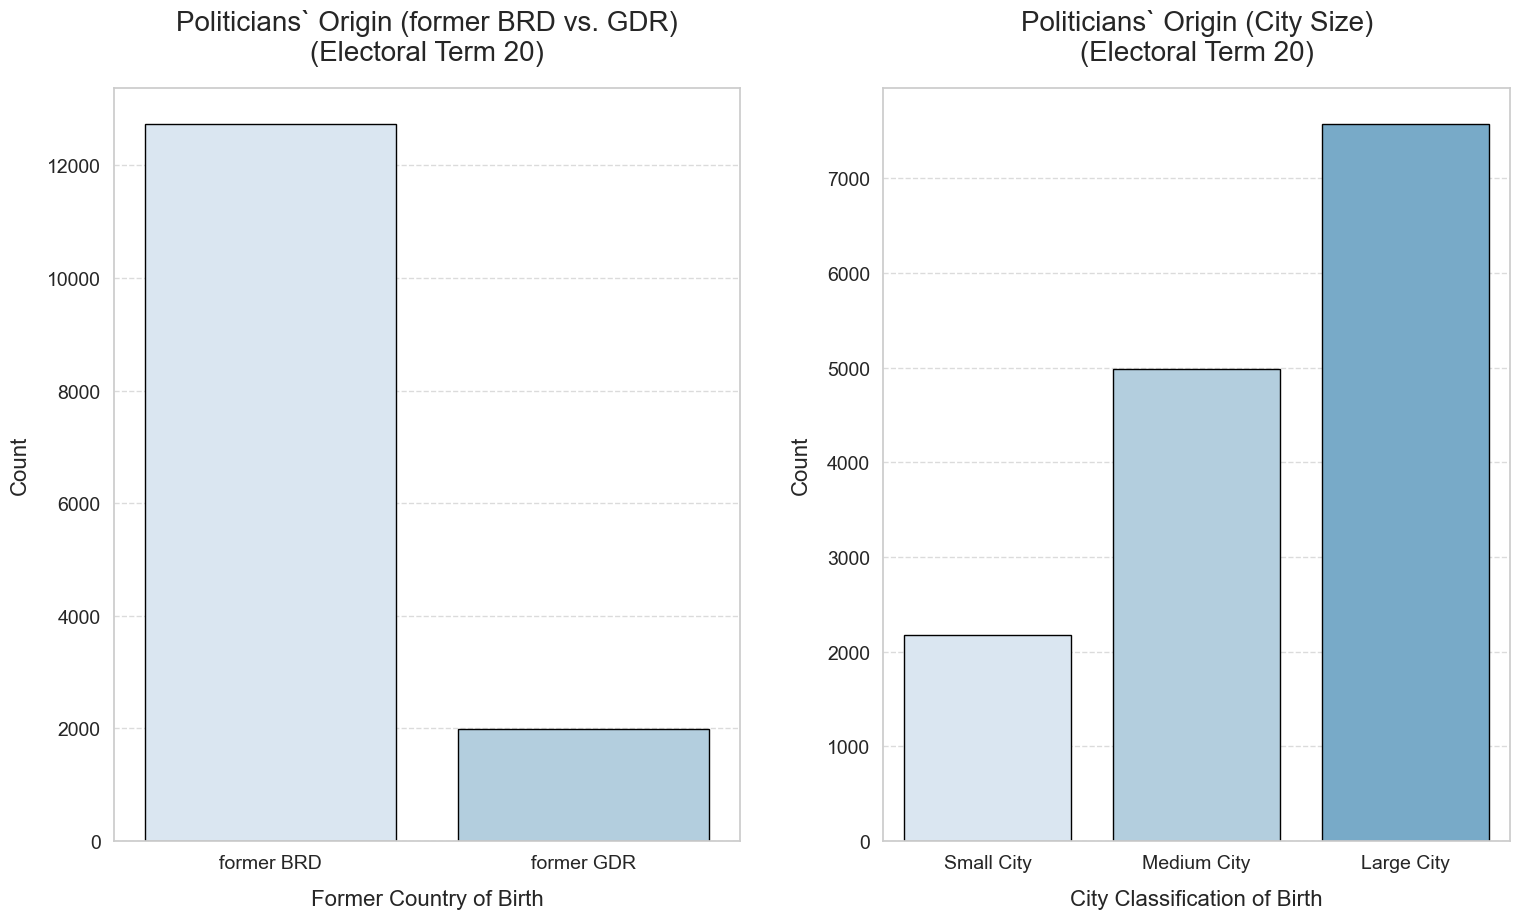

In [102]:
# Set up Seaborn style
sns.set(style="whitegrid")
blue_palette = sns.color_palette("Blues", n_colors=5)

# --- Plotting the distribution of Former Country of Birth for Electoral Term 20 ---
fig, axes = plt.subplots(1, 2, figsize=(16, 10))  # Set up side-by-side subplots

# Left Plot: Former Country of Birth
sns.countplot(
    data=content_df_features_cities, 
    x='Former Country', 
    palette=blue_palette, 
    edgecolor='black',
    order=content_df_features_cities['Former Country'].value_counts().index, 
    ax=axes[0]
)

# Title and axis labels for the left plot
axes[0].set_title('Politicians` Origin (former BRD vs. GDR)\n(Electoral Term 20)', fontsize=20, pad=20)
axes[0].set_xlabel('Former Country of Birth', fontsize=16, labelpad=12)
axes[0].set_ylabel('Count', fontsize=16, labelpad=12)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right Plot: City Classification of Birth
sns.countplot(
    data=content_df_features_cities, 
    x='City Classification', 
    palette=blue_palette, 
    edgecolor='black',
    order=['Small City', 'Medium City', 'Large City'], 
    ax=axes[1]
)

# Title and axis labels for the right plot
axes[1].set_title('Politicians` Origin (City Size)\n(Electoral Term 20)', fontsize=20, pad=20)
axes[1].set_xlabel('City Classification of Birth', fontsize=16, labelpad=12)
axes[1].set_ylabel('Count', fontsize=16, labelpad=12)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout(pad=3)  # Add padding for readability
plt.savefig("distribution_former_country_city_classification_electoral_term_20.png", format='png', dpi=300, bbox_inches='tight')
plt.show()
